In [1]:
from sympy import *


# 核心决策自变量
x, y, z = symbols('x y z')
# 区块链相关参数
M_1, M_2, P, theta_1, theta_2, k, S = symbols('M_1 M_2 P theta_1 theta_2 k S')
C_1, C_2, C_3, C_4 = symbols('C_1 C_2 C_3 C_4')
R_1, R_2 = symbols('R_1 R_2')
# 医疗事故相关
L_1, L_2 = symbols('L_1 L_2')
H = symbols('H')
F, a_1, a_2 = symbols('F a_1 a_2')

In [2]:
# # 定义矩阵元素
# # 关于下标：前三位数字的0代表负向决策，最后一位数字123分别代表患者/医院/政府
# F_1111 = k*theta_1*P - a_1*(L_1)
# F_1112 = (S+R_1)-C_1 - a_1*(H+F)
# F_1113 = R_2+a_1*F-C_3-S
# F_0111 = - a_1*(L_2)
# F_0112 = S-C_1 - a_1*(H+F)
# F_0113 = a_1*F-C_3-S
# F_1101 = k*theta_1*P - a_1*(L_1)
# F_1102 = R_1-C_1 - a_1*(H+F)
# F_1103 = a_1*F-C_4
# F_0101 = - a_1*(L_1)
# F_0102 = -C_1 - a_1*(H+F)
# F_0103 = a_1*F-C_4

# F_1011 = k*theta_2*P - a_2*(L_2)
# F_1012 = R_1-C_2 - a_2*(H+F)
# F_1013 = a_2*F-C_3
# F_0011 = - a_2*(L_2)
# F_0012 = -C_2 - a_2*(H+F)
# F_0013 = a_2*F-C_3
# F_1001 = k*theta_2*P - a_2*(L_2)
# F_1002 = R_1-C_2 - a_2*(H+F)
# F_1003 = a_2*F-C_4
# F_0001 = - a_2*(L_2)
# F_0002 = -C_2 - a_2*(H+F)
# F_0003 = a_2*F-C_4

In [3]:
# 定义矩阵元素
# 关于下标：前三位数字的0代表负向决策，最后一位数字123分别代表患者/医院/政府
F_1111 = P - a_1*(L_1) - M_1    # Mark
F_1112 = (S+R_1)-C_1 - a_1*(H+F)
F_1113 = R_2+a_1*F-C_3
F_0111 = - a_1*(L_2)
F_0112 = S-C_1 - a_1*(H+F)
F_0113 = a_1*F-C_3
F_1101 = P - a_1*(L_1) - M_1    # Mark
F_1102 = R_1-C_1 - a_1*(H+F)
F_1103 = a_1*F-C_4
F_0101 = - a_1*(L_2)
F_0102 = -C_1 - a_1*(H+F)
F_0103 = a_1*F-C_4

F_1011 = P - a_2*(L_1) - M_2    # Mark
F_1012 = R_1-C_2 - a_2*(H+F)
F_1013 = a_2*F-C_3
F_0011 = - a_2*(L_2)
F_0012 = -C_2 - a_2*(H+F)
F_0013 = a_2*F-C_3
F_1001 = P - a_2*(L_1) - M_2    # Mark
F_1002 = R_1-C_2 - a_2*(H+F)
F_1003 = a_2*F-C_4
F_0001 = - a_2*(L_2)
F_0002 = -C_2 - a_2*(H+F)
F_0003 = a_2*F-C_4

In [4]:
# 计算单独收益 - 患者
U_1 = z*y*F_1111\
    +z*(1-y)*F_1011\
    +y*(1-z)*F_1101\
    +(1-z)*(1-y)*F_1001
U_2 = z*y*F_0111\
    +z*(1-y)*F_0011\
    +y*(1-z)*F_0101\
    +(1-z)*(1-y)*F_0001
# 计算单独收益 - 医院
V_1 = z*x*F_1112\
    +z*(1-x)*F_0112\
    +x*(1-z)*F_1102\
    +(1-z)*(1-x)*F_0102
V_2 = z*x*F_1012\
    +z*(1-x)*F_0012\
    +x*(1-z)*F_1002\
    +(1-z)*(1-x)*F_0002
# 计算单独收益 - 政府
W_1 = y*x*F_1113\
    +y*(1-x)*F_0113\
    +x*(1-y)*F_1013\
    +(1-y)*(1-x)*F_0013
W_2 = y*x*F_1103\
    +y*(1-x)*F_0103\
    +x*(1-y)*F_1003\
    +(1-y)*(1-x)*F_0003

In [17]:
# 计算复制动态方程
F_x = factor(x*(1-x)*(U_1-U_2))
F_y = factor(y*(1-y)*(V_1-V_2))
F_z = factor(z*(1-z)*(W_1-W_2))

# 计算雅可比矩阵J的各维度元素
J_11 = factor(diff(F_x, x))
J_12 = factor(diff(F_x, y))
J_13 = factor(diff(F_x, z))

J_21 = factor(diff(F_y, x))
J_22 = factor(diff(F_y, y))
J_23 = factor(diff(F_y, z))

J_31 = factor(diff(F_z, x))
J_32 = factor(diff(F_z, y))
J_33 = factor(diff(F_z, z))

J_33

-(2*z - 1)*(-C_3 + C_4 + R_2*x*y)

In [21]:
F_x,F_y,F_z

(x*(x - 1)*(L_1*a_1*y - L_1*a_2*y + L_1*a_2 - L_2*a_1*y + L_2*a_2*y - L_2*a_2 + M_1*y - M_2*y + M_2 - P),
 -y*(y - 1)*(-C_1 + C_2 - F*a_1 + F*a_2 - H*a_1 + H*a_2 + S*z),
 -z*(z - 1)*(-C_3 + C_4 + R_2*x*y))

In [76]:
# 赋值
values_dict = dict()

# 核心决策自变量
x = 0.5
y = 0.5
z = 0.5
# 区块链相关参数


In [80]:
print(J_12.evalf(subs = values_dict))

0.375000000000000


In [ ]:
"""
 MATLAB:  [t,y]=ode45(@vdp1,[0 20],[2 0]);

 Python:  import numpy as np
          def  vdp1(t,y):
              dydt= np.array([y[1], (1-y[0]**2)*y[1]-y[0]])
              return dydt
          import scipy integrate 
          l=scipy.integrate.ode(vdp1([0,20],[2,0])).set_integrator("dopri5")
"""

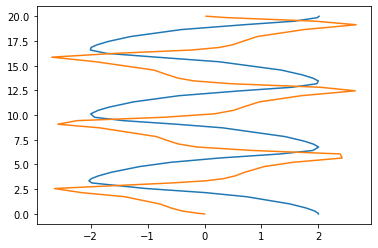

In [18]:
from scipy.integrate import solve_ivp

vdp1 = lambda T,Y: [Y[1], (1 - Y[0]**2) * Y[1] - Y[0]]
sol = solve_ivp (vdp1, [0, 20], [2, 0])

T = sol.t
Y = sol.y

import matplotlib.pyplot as plt
plt.plot(Y[0,:],T)
plt.plot(Y[1,:],T)

In [2]:
from scipy.integrate import odeint 
from numpy import arange 
dy=lambda y, x: -2*y+x**2+2*x 
x=arange(1, 10.5, 0.5) 
sol=odeint(dy, 2, x)
print("x={}\n 对应的数值解y={}".format(x, sol. T))

x=[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10. ]
 对应的数值解y=[[ 2.          2.08484933  2.9191691   4.18723381  5.77289452  7.63342241
   9.75309843 12.12613985 14.75041934 17.62515427 20.75005673 24.12502089
  27.7500077  31.62500278 35.75000104 40.1250004  44.75000015 49.62500006
  54.75000002]]


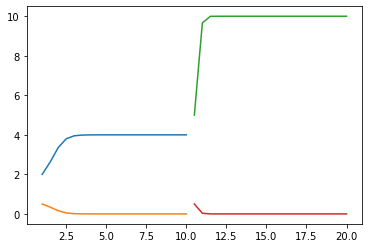

In [30]:
"""
function dxdt=differential(x,t)
dxdt=[x(1)*(1-x(1))*(-0.2-x(2)*x(3)),x(2)*(1-x(2))*(-0.2-x(1)*x(3)),x(3)*(1-x(3))*(0.2-x(2)*x(1))]
end
"""
import warnings
warnings.filterwarnings("ignore")
from numpy import arange 
import numpy as np
def Pfun(y,x):
    y1,y2=y
    return np.array([y1*(1-y1)*(1-1-1*y2),y2*(1-y2)*(1-1+1-1*y1)])
x1=arange(1, 10.5, 0.5) 
x2=arange(10.5, 20.5, 0.5) 
sol1=odeint(Pfun, [2,0.5], x1)
sol2=odeint(Pfun, [5,0.5], x2)
import matplotlib.pyplot as plt
plt.plot(x1,sol1.T[0,:])
plt.plot(x1,sol1.T[1,:])
plt.plot(x2,sol2.T[0,:])
plt.plot(x2,sol2.T[1,:])

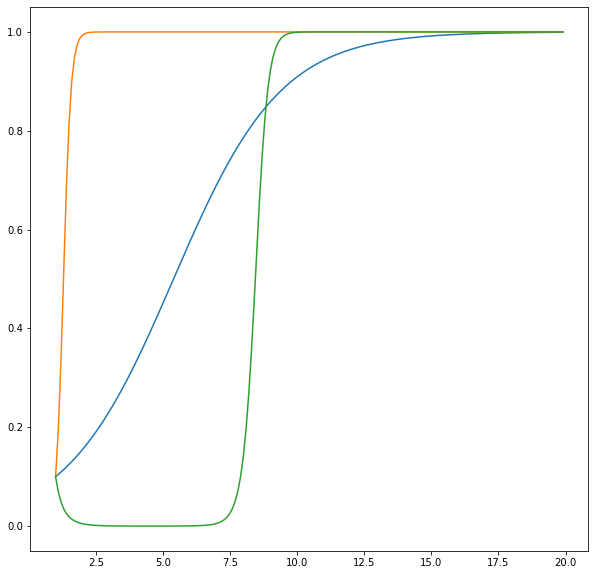

In [34]:
"""
function dxdt=differential(x,t)
dxdt=[x(1)*(1-x(1))*(-0.2-x(2)*x(3)),x(2)*(1-x(2))*(-0.2-x(1)*x(3)),x(3)*(1-x(3))*(0.2-x(2)*x(1))]
end
"""
import warnings
warnings.filterwarnings("ignore")
from numpy import arange 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 


def Pfun(F,t,a=3):
    x,y,z=F
    
    P = 1
    M_1 = 5
    M_2 = 8
    L_1 = 500
    L_2 = 650
    a_1 = 0.03
    a_2 = 0.05
    R_1 = 10
    R_2 = 10
    S = 7
    C_1 = 10
    C_2 = 5
    C_3 = 10
    C_4 = 6
    H = 100
    F = 500
    
    return np.array([(x*(x - 1)*(L_1*a_1*y - L_1*a_2*y + L_1*a_2 - L_2*a_1*y + L_2*a_2*y - L_2*a_2 + M_1*y - M_2*y + M_2 - P)),\
                      -y*(y - 1)*(-C_1 + C_2 - F*a_1 + F*a_2 - H*a_1 + H*a_2 + S*z),\
                      -z*(z - 1)*(-C_3 + C_4 + R_2*x*y)
                    ])

t = arange(1, 20, 0.1) 
xyz_init = [0.1,0.1,0.1]
sol = odeint(Pfun, xyz_init, t)
fig = plt.figure(figsize=(10,10))
for i in range(3):
    plt.plot(t, sol.T[i,:])


No handles with labels found to put in legend.


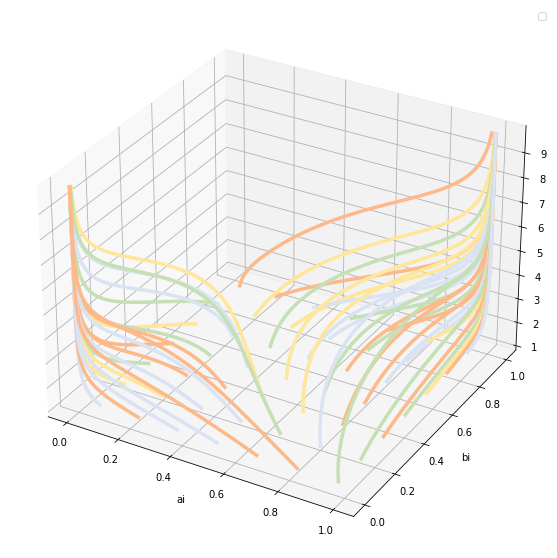

In [116]:
import warnings
warnings.filterwarnings("ignore")
from numpy import arange 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from scipy.integrate import odeint 
mpl.rcParams['legend.fontsize = 10
g
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
plt.xlabel('ai')
plt.ylabel('bi')

def Pfun(y,x,a=3):
    y1,y2=y
    return np.array([y1*(1-y1)*(a*y2-2),\
                     y2*(1-y2)*(4*y1-1)
                    ])
x=arange(1, 10, 0.1) 
y1_lt=[i for i in arange(0.05,1,0.15)]
y2_lt=[i for i in arange(0.05,1,0.15)]
par_lt=[]
for i in y1_lt:
    for j in y2_lt:
        par_lt.append([i,j])
color=["#C5E0B4","#FFE699","#FEB98A","#DAE3F3"]

for ij in par_lt:
    sol=odeint(Pfun, ij, x)
    X,Y,Z = sol.T[0,:],sol.T[1,:],x
    rcolor = random.sample(color,1)[0]
    ax.plot(X,Y,Z,'go-',zdir="z",c=rcolor,marker=",",linewidth=3.5) 
    #zdir可以控制坐标系旋转 比如z轴向右
    #maker=',' 像素
    
ax.legend()   
plt.show()


## 相位图画法

In [1]:
import random
import matplotlib.pyplot as plt
# define system in terms of separated differential equations 离散微分方程
def f(x,y):
    return x*(1-x)*(5*y-2)
def g(x,y):
    return y*(1-y)*(4*x-2)

# initialize lists containing values
def sys(iv1, iv2, dt, time):
    x = []
    y = []
    # initial values:
    x.append(iv1)
    y.append(iv2)
    #z.append(iv3)
    # compute and fill lists
    for i in range(time):
        x.append(x + (f(x,y)) * dt)
        y.append(y + (g(x,y)) * dt)
        #z.append(z + (h(x,y,z)) * dt)
    return (x, y)


print("\n")
D=[]
for i in range(500):
    a=random.random()
    b=random.random()
    d=sys(a,b,0.01,1000)
    D.append(d)


"""画图"""
#plot
fig = plt.figure(figsize=(17,15))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for n,m in D:
    ax1.plot(n, 'r-')
    ax1.plot(m, 'b-')
    ax2.plot(n, m, color="blue")
#ax1.plot(z, 'g-', label='prey')
ax1.set_title("Dynamic in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')


ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
ax2.grid()

plt.show() 

TypeError: unsupported operand type(s) for -: 'int' and 'list'